# Final Project (Trending Youtube Video Statistics)

In [1]:
from datetime import datetime, date, timedelta
from matplotlib.mathtext import MathTextWarning
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import json
import re

pd.options.mode.chained_assignment = None
USdata = pd.read_csv('../Data/youtube/USvideos.csv')
CAdata = pd.read_csv('../Data/youtube/CAvideos.csv')
DEdata = pd.read_csv('../Data/youtube/DEvideos.csv')
FRdata = pd.read_csv('../Data/youtube/FRvideos.csv')
GBdata = pd.read_csv('../Data/youtube/GBvideos.csv')
INdata = pd.read_csv('../Data/youtube/INvideos.csv')

# Trending Youtube Videos Statistics

## Data Processing

### Adding a country column

In [2]:
USdata['country'] = USdata['title'].apply(lambda x: 'USA')
CAdata['country'] = CAdata['title'].apply(lambda x: 'Canada')
DEdata['country'] = DEdata['title'].apply(lambda x: 'Germany')
FRdata['country'] = FRdata['title'].apply(lambda x: 'France')
GBdata['country'] = GBdata['title'].apply(lambda x: 'Great Britain')

### Combining dataframes

In [3]:
ALLdata = pd.concat([USdata, CAdata, DEdata, FRdata, GBdata, INdata], sort=True)

In [4]:
ALLdata.head()

,category_id,channel_title,comment_count,comments_disabled,country,description,dislikes,likes,publish_time,ratings_disabled,tags,thumbnail_link,title,trending_date,video_error_or_removed,video_id,views
0,22,CaseyNeistat,15954,False,USA,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2966,57527,2017-11-13T17:13:01.000Z,False,SHANtell martin,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,WE WANT TO TALK ABOUT OUR MARRIAGE,17.14.11,False,2kyS6SvSYSE,748374
1,24,LastWeekTonight,12703,False,USA,"One year after the presidential election, John...",6146,97185,2017-11-13T07:30:00.000Z,False,"last week tonight trump presidency|""last week ...",https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,The Trump Presidency: Last Week Tonight with J...,17.14.11,False,1ZAPwfrtAFY,2418783
2,23,Rudy Mancuso,8181,False,USA,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,5339,146033,2017-11-12T19:05:24.000Z,False,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,"Racist Superman | Rudy Mancuso, King Bach & Le...",17.14.11,False,5qpjK5DgCt4,3191434
3,24,Good Mythical Morning,2146,False,USA,Today we find out if Link is a Nickelback amat...,666,10172,2017-11-13T11:00:04.000Z,False,"rhett and link|""gmm""|""good mythical morning""|""...",https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Nickelback Lyrics: Real or Fake?,17.14.11,False,puqaWrEC7tY,343168
4,24,nigahiga,17518,False,USA,I know it's been a while since we did this sho...,1989,132235,2017-11-12T18:01:41.000Z,False,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I Dare You: GOING BALD!?,17.14.11,False,d380meD0W0M,2095731


### Removing duplicates

In [5]:
ALLdata = ALLdata.drop_duplicates(['title'], keep='last')

### Convert trending and published date to the same format

In [6]:
def convert_trending_date(date):
    date = datetime.strptime(date, '%y.%d.%m')
    return date.strftime('%m/%d/%Y')
ALLdata['trending_date'] = ALLdata['trending_date'].apply(lambda date: convert_trending_date(date))

In [7]:
def convert_publish_date(date):
    date = re.sub('T.+', '', date)
    date = datetime.strptime(date, '%Y-%m-%d')
    return date.strftime('%m/%d/%Y')
ALLdata['publish_time'] = ALLdata['publish_time'].apply(lambda date: convert_publish_date(date))

### Create category column from category_id column

In [8]:
def convert_category_id(data, nation='US'):
    id_to_category = {}
    with open('../Data/youtube/{}_category_id.json'.format(nation), 'r') as f:
        file_data = json.load(f)
        for category in file_data['items']:
            id_to_category[category['id']] = category['snippet']['title']
    ALLdata['category'] = ALLdata['category_id'].apply(lambda x: id_to_category[str(x)])

### Creating a formatted title column

In [9]:
lowercase = 'abcdefghijklmnopqrstuvwxyz '
BASE_TEXT = set(lowercase)
ALLdata['formatted_title'] = ALLdata['title'].apply(lambda text: ''.join(char for char in text.lower() if char in BASE_TEXT))

In [10]:
ALLdata.head()

,category_id,channel_title,comment_count,comments_disabled,country,description,dislikes,likes,publish_time,ratings_disabled,tags,thumbnail_link,title,trending_date,video_error_or_removed,video_id,views,formatted_title
10,17,NFL,177,False,USA,New England Patriots returner Dion Lewis blast...,25,655,11/13/2017,False,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,11/14/2017,False,9wRQljFNDW8,81377,dion lewis yd kick return td vs denver cantmi...
36,1,Screen Junkies,2111,False,USA,With Justice League approaching fast we rewatc...,792,7515,11/12/2017,False,"screenjunkies|""screen junkies""|""sj news""|""hone...",https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,TL;DW - Every DCEU Movie Before Justice League,11/14/2017,False,Om_zGhJLZ5U,288922,tldw every dceu movie before justice league
41,25,BBC News,413,False,USA,A strong 7.2-magnitude earthquake has rattled ...,26,308,11/12/2017,False,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,Iraq-Iran earthquake: Deadly tremor hits borde...,11/14/2017,False,goP4Z5wyOlM,34785,iraqiran earthquake deadly tremor hits border ...
44,22,Shawn Johnson East,895,False,USA,Subscribe for weekly videos ▶ http://bit.ly/sj...,1772,4451,11/11/2017,False,"shawn johnson|""andrew east""|""shawn east""|""shaw...",https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",11/14/2017,False,STI2fI7sKMo,321053,affairs ex boyfriends million net worth googl...
46,24,People are Awesome,160,False,USA,Pets are Awesome! This is for all the animal l...,33,3417,11/13/2017,False,"people are awesome|""people are awesome 2017""|""...",https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,People are Awesome & The Pet Collective presen...,11/14/2017,False,ogYum4kWXgk,69844,people are awesome the pet collective present...


# Tredning YouTube Statistics Questions
1. Generally, how long does it take a video to start trending?
2. Is there a corrilation between the number of likes and the number of comments?
3. Are they certian keywords that tend to be in trending videos?
4. What videos had the most views, likes, dislikes, and comment count?
5. What channel had the most views, likes, dislikes, and comment count?

## Generally, how long does it take a video to start trending?

In [11]:
from datetime import datetime, date
import re

dates = zip(ALLdata['trending_date'].values, ALLdata['publish_time'].values)
days_till_trending = []
for trend_date, pub_date in dates:
    pub_date = datetime.strptime(pub_date, '%m/%d/%Y')
    trend_date = datetime.strptime(trend_date, '%m/%d/%Y')
    dif = trend_date - pub_date
    dif = pd.to_numeric(dif.days, downcast='integer')
    days_till_trending.append(dif)
ALLdata['days_till_trending'] = days_till_trending
ALLdata['days_till_trending'].sum()/len(ALLdata['days_till_trending'])

5.887301486737624

## Are there corrilations between likes, views, dislikes, or comment count?

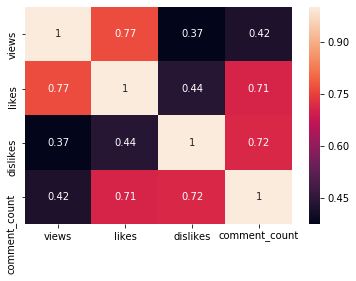

In [12]:
numerical_data = ALLdata[['views', 'likes', 'dislikes', 'comment_count']]
sns.heatmap(numerical_data.corr(), annot=True)

## Are there certian keywords that tend to be in trending video titles?

In [13]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
titles = ALLdata['formatted_title'].unique()
keywords = {}
    
for title in titles:
    for word in title.split(' '):
        if word not in stopwords and word != '':
            if word in keywords:
                keywords[word] += 1
            else:
                keywords[word] = 1
keyword_counts = {}
for key, value in keywords.items():
    if value > 800 and len(key) > 2:
        keyword_counts[key] = value

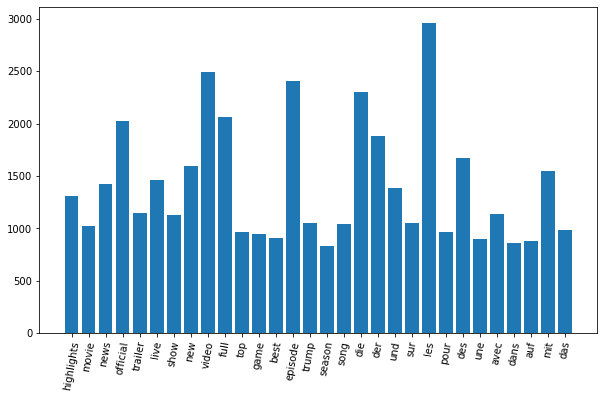

['highlights', 'movie', 'news', 'official', 'trailer', 'live', 'show', 'new', 'video', 'full', 'top', 'game', 'best', 'episode', 'trump', 'season', 'song', 'die', 'der', 'und', 'sur', 'les', 'pour', 'des', 'une', 'avec', 'dans', 'auf', 'mit', 'das']


In [14]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=80)
plt.bar(list(keyword_counts.keys()), list(keyword_counts.values()))
plt.show()
print(list(keyword_counts.keys()))

## Looking at the top videos by likes, views, and comments

In [15]:
def visualize_most(my_df, column, num=10): # getting the top 10 videos by default
    sorted_df = my_df.sort_values(column, ascending=False).iloc[:num]
    ax = sorted_df[column].plot.barh(figsize=(10,6))
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df['title']:
        labels.append(item)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel(column)
    ax.set_title('Which videos had the me most {}'.format(column))
    plt.show()
    print(labels)

### Which videos had the most viewed videos

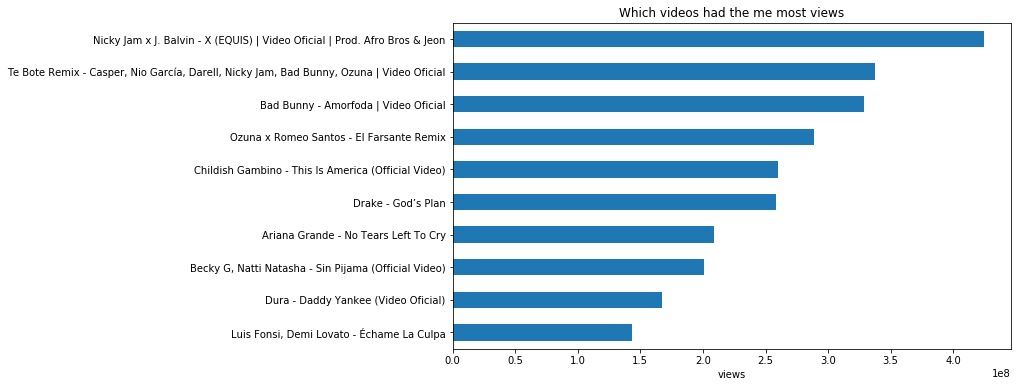

['Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon', 'Te Bote Remix - Casper, Nio García, Darell, Nicky Jam, Bad Bunny, Ozuna | Video Oficial', 'Bad Bunny - Amorfoda | Video Oficial', 'Ozuna x Romeo Santos - El Farsante Remix', 'Childish Gambino - This Is America (Official Video)', 'Drake - God’s Plan', 'Ariana Grande - No Tears Left To Cry', 'Becky G, Natti Natasha - Sin Pijama (Official Video)', 'Dura - Daddy Yankee (Video Oficial)', 'Luis Fonsi, Demi Lovato - Échame La Culpa']


In [16]:
visualize_most(ALLdata, 'views')

### Which videos had the most likes?

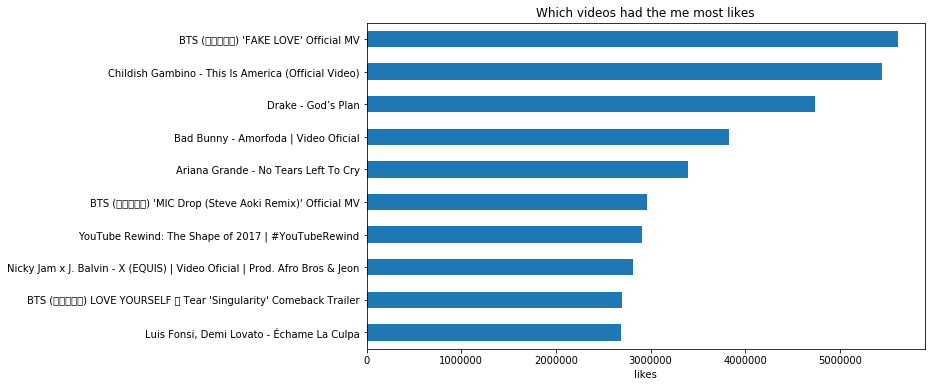

["BTS (방탄소년단) 'FAKE LOVE' Official MV", 'Childish Gambino - This Is America (Official Video)', 'Drake - God’s Plan', 'Bad Bunny - Amorfoda | Video Oficial', 'Ariana Grande - No Tears Left To Cry', "BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV", 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind', 'Nicky Jam x J. Balvin - X (EQUIS) | Video Oficial | Prod. Afro Bros & Jeon', "BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity' Comeback Trailer", 'Luis Fonsi, Demi Lovato - Échame La Culpa']


In [26]:
visualize_most(ALLdata, 'likes')

### Which vidoes had the most dislikes

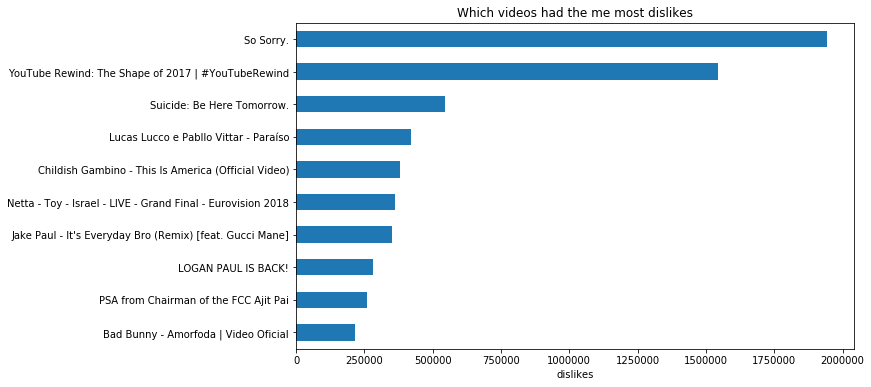

['So Sorry.', 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind', 'Suicide: Be Here Tomorrow.', 'Lucas Lucco e Pabllo Vittar - Paraíso', 'Childish Gambino - This Is America (Official Video)', 'Netta - Toy - Israel - LIVE - Grand Final - Eurovision 2018', "Jake Paul - It's Everyday Bro (Remix) [feat. Gucci Mane]", 'LOGAN PAUL IS BACK!', 'PSA from Chairman of the FCC Ajit Pai', 'Bad Bunny - Amorfoda | Video Oficial']


In [18]:
visualize_most(ALLdata, 'dislikes')

### Which videos had the most comment count?

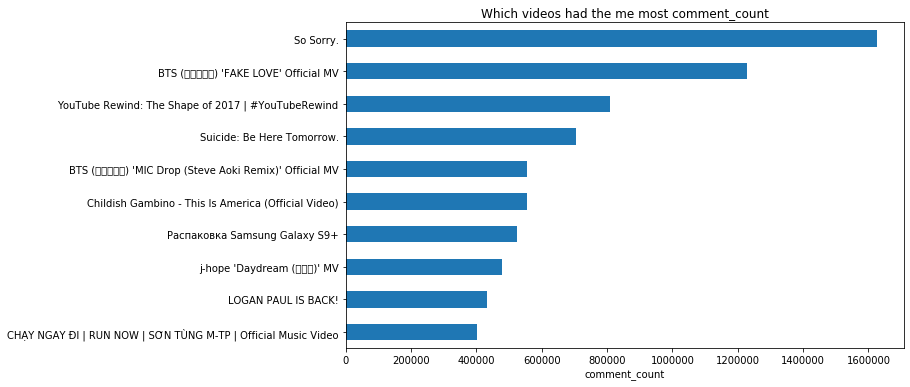

['So Sorry.', "BTS (방탄소년단) 'FAKE LOVE' Official MV", 'YouTube Rewind: The Shape of 2017 | #YouTubeRewind', 'Suicide: Be Here Tomorrow.', "BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV", 'Childish Gambino - This Is America (Official Video)', 'Распаковка Samsung Galaxy S9+', "j-hope 'Daydream (백일몽)' MV", 'LOGAN PAUL IS BACK!', 'CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Official Music Video']


In [27]:
visualize_most(ALLdata, 'comment_count')

## Looking at US channels with the most view, likes, dislikes, and comment count

In [20]:
# Helper function to sort and array of tuples based in second value in tuples
def sort_tuple(tup):  
    # getting length of list of tuples 
    for i in range(len(tup)):  
        for j in range(0, len(tup)-i-1):  
            if (tup[j][1] > tup[j + 1][1]):  
                temp = tup[j]  
                tup[j]= tup[j + 1]  
                tup[j + 1]= temp  
    return tup

In [21]:
def visualize_most_channel(df, column, num=10): # getting the top 10 videos by default
    channels = df['channel_title'].unique()
    channel_values = []
    for channel in channels:
        channel_values.append((channel, df[df['channel_title'] == channel].sum()[column]))
    sorted_channels = sort_tuple(channel_values)
    channel_titles = [title for title, value in sorted_channels]
    channel_values = [value for title, value in sorted_channels]
    plt.barh(channel_titles[-10:], channel_values[-10:])
    plt.show()
    print(channel_titles[-10:])

### Which US channels had the most views?

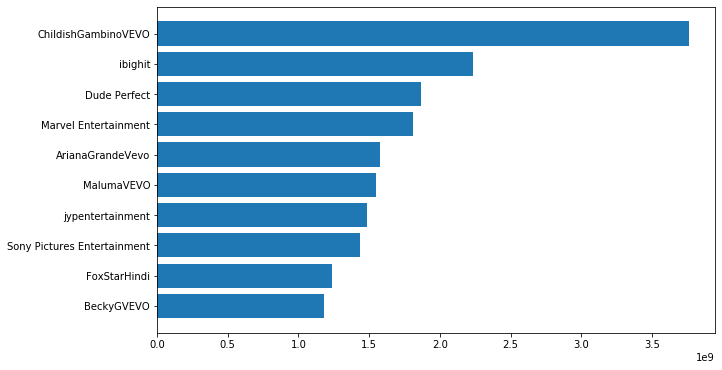

['BeckyGVEVO', 'FoxStarHindi', 'Sony Pictures Entertainment', 'jypentertainment', 'MalumaVEVO', 'ArianaGrandeVevo', 'Marvel Entertainment', 'Dude Perfect', 'ibighit', 'ChildishGambinoVEVO']


In [22]:
plt.figure(figsize=(10,6))
visualize_most_channel(USdata, 'views')

### Which US channels had the most likes?

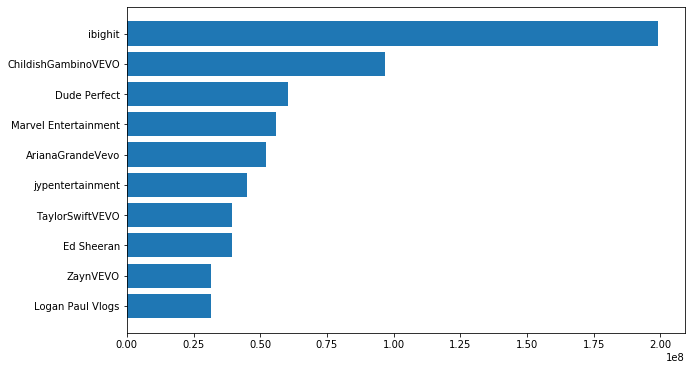

['Logan Paul Vlogs', 'ZaynVEVO', 'Ed Sheeran', 'TaylorSwiftVEVO', 'jypentertainment', 'ArianaGrandeVevo', 'Marvel Entertainment', 'Dude Perfect', 'ChildishGambinoVEVO', 'ibighit']


In [23]:
plt.figure(figsize=(10,6))
visualize_most_channel(USdata, 'likes')

### Which US channels had the most dislikes?

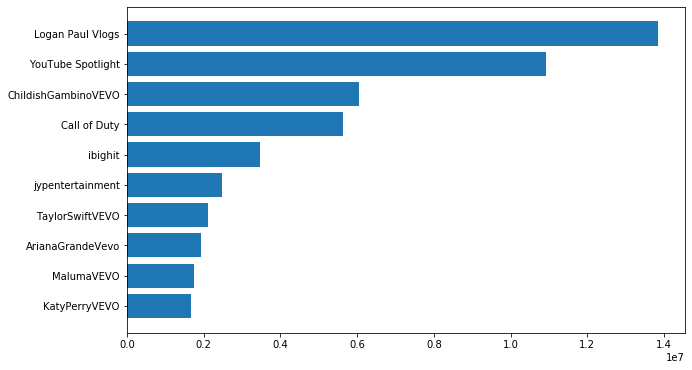

['KatyPerryVEVO', 'MalumaVEVO', 'ArianaGrandeVevo', 'TaylorSwiftVEVO', 'jypentertainment', 'ibighit', 'Call of Duty', 'ChildishGambinoVEVO', 'YouTube Spotlight', 'Logan Paul Vlogs']


In [24]:
plt.figure(figsize=(10,6))
visualize_most_channel(USdata, 'dislikes')

### Which US channels had the most commnets?

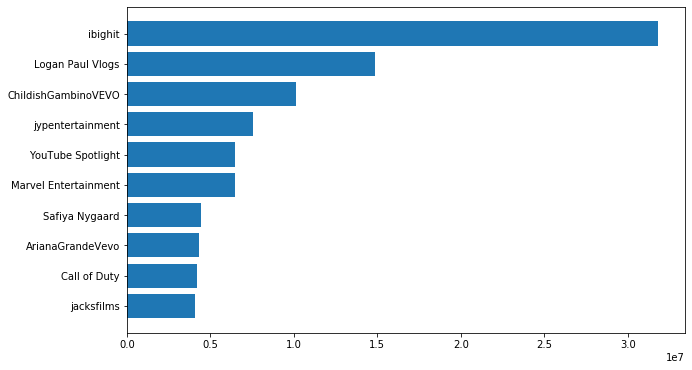

['jacksfilms', 'Call of Duty', 'ArianaGrandeVevo', 'Safiya Nygaard', 'Marvel Entertainment', 'YouTube Spotlight', 'jypentertainment', 'ChildishGambinoVEVO', 'Logan Paul Vlogs', 'ibighit']


In [25]:
plt.figure(figsize=(10,6))
visualize_most_channel(USdata, 'comment_count')